# Классификация ирисов Фишера с помощью метода kNN. Использованиеансамблевых моделей на основе деревьев решений


## 1. Используя метод k-NN, решим задачу классификации ирисов Фишера.


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


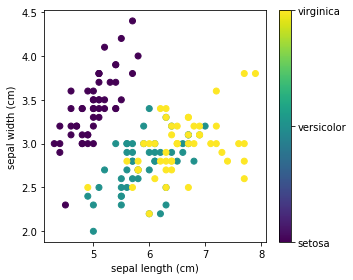

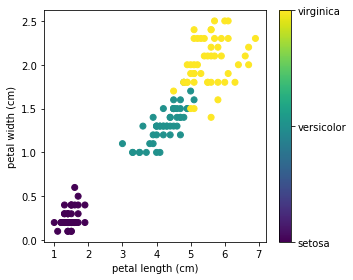

3.59722114972099
3.4899856733230297
3.539774004085572
3.66742416417845
2.128379665379276
0.0
1.1874342087037915
2.5159491250818244
1.6217274740226855
2.2158519806160335
(array([6.6, 3. , 4.4, 1.4]), 0.0, 1)
(array([5.5, 2.6, 4.4, 1.2]), 1.1874342087037915, 1)
(array([6.9, 3.2, 5.7, 2.3]), 1.6217274740226855, 2)
Expected 1, Got 1.


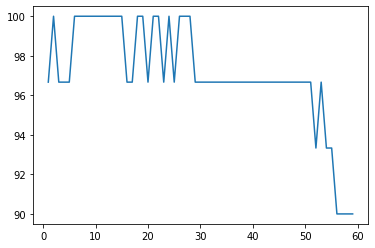

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

### Загрузим данные, посмотрим на них

iris = load_iris()
type(iris)
print(iris.feature_names)
print(iris.target_names)

### Plot a simple scatter plot of 2 features of the iris dataset

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

### other 2 features

# The indices of the features that we are plotting
x_index = 2
y_index = 3

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])


plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

### Входные данные X и правильные ответы y
X = iris.data
y = iris.target

###
# Calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0
    for i in range(len(row1)):
        distance += (row1[i] - row2[i])**2
    return np.sqrt(distance)
 
# Locate the most similar neighbors
def get_neighbors(train_set, labels, test_row, num_neighbors):
    distances = list()
    for index in range(len(train_set)):
        dist = euclidean_distance(test_row, train_set[index])
        distances.append((train_set[index], dist, labels[index]))
    distances.sort(key=lambda tup: tup[1])
    neighbors = distances[:num_neighbors]
    return neighbors
 
# Make a prediction with neighbors
def predict_classification(train_set, labels, test_row, num_neighbors):
    neighbors = get_neighbors(train_set, labels, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction
 
# kNN Algorithm
def k_nearest_neighbors(train_set, labels, test, num_neighbors):
    predictions = list()
    for row in test:
        output = predict_classification(train_set, labels, row, num_neighbors)
        predictions.append(output)
    return(predictions)
 
#%% Тестируем функции
dataset=X[:150:15]
output=y[:150:15]
for row in dataset:
    d = euclidean_distance(dataset[5], row)
    print(d)
    
neighbors = get_neighbors(dataset, output, dataset[5], 3)
for neighbor in neighbors:
    print(neighbor)
    
prediction = predict_classification(dataset, output, dataset[5], 3)
print('Expected %d, Got %d.' % (output[5], prediction))
    
### Разобъем выборку на обучающую и тестовую

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
### Запускаем kNN на нашей выборке
num_neighbors = 7
predictions = k_nearest_neighbors(X_train, y_train, X_test, num_neighbors)

### Оценим результат
# найдем долю правильных ответов
np.mean(predictions == y_test) * 100

### Встроенный в sklearn метод
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(num_neighbors)
knn.fit(X_train,y_train)
predictions_sk = knn.predict(X_test)
np.mean(predictions_sk == y_test) * 100
###
np.mean(predictions == predictions_sk) * 100

###
scores_list=[]
for k in range(1,60):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train,y_train)
    predictions_sk = knn.predict(X_test)
    scores_list.append(np.mean(predictions_sk == y_test) * 100)
    
plt.plot(range(1,60), scores_list)